In [570]:
import pandas as pd

In [571]:
data=pd.read_csv("https://raw.githubusercontent.com/Ravikumarchavva/ML_Playground/main/week1_regressionAnalysis/Day6_Ensembling/train_errorAnalysed.csv")
data

,car_ID,aspiration,carbody,enginelocation,enginetype,fuelsystem,price,carclass,brandavg,carspace,averagempg,performancebalance,enginedisplacement,horsepower
0,2,std,convertible,front,dohc,mpfi,4.217484,2.0,16500.0,958659.088,23.333333,5.234473,3.214396,111
1,4,std,sedan,front,ohc,mpfi,4.144574,3.0,17710.0,1166753.816,26.373626,5.095493,3.451351,102
2,5,std,sedan,front,ohc,mpfi,4.241795,3.0,17710.0,1165588.256,19.603960,5.197083,3.775862,115
3,6,std,sedan,front,ohc,mpfi,4.183270,3.0,17710.0,1173148.002,21.300448,5.162112,3.775862,110
4,7,std,sedan,front,ohc,mpfi,4.248219,3.0,17710.0,1455678.924,21.300448,5.216887,3.775862,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,199,turbo,sedan,front,ohc,mpfi,4.265290,3.0,18420.0,1323291.648,18.936709,5.376780,3.461681,162
135,200,turbo,wagon,front,ohc,mpfi,4.277609,3.0,18420.0,1323291.648,18.936709,5.392467,3.461681,162
136,201,std,sedan,front,ohc,mpfi,4.226471,3.0,18420.0,1419207.712,25.009709,5.341955,3.499248,114
137,202,turbo,sedan,front,ohc,mpfi,4.279781,3.0,18420.0,1417147.904,21.300448,5.441609,3.499248,160


In [572]:
import tensorflow as tf
numeric_data = data.select_dtypes(include=[int, float])

# Convert the numeric DataFrame to a NumPy array
numpy_data = numeric_data.drop("price",axis=1).to_numpy()

# Convert the NumPy array to a TensorFlow tensor
x = tf.convert_to_tensor(numpy_data, dtype=tf.float32)

# Print the tensor to confirm
print(x)

tf.Tensor(
[[2.0000000e+00 2.0000000e+00 1.6500000e+04 ... 5.2344728e+00
  3.2143958e+00 1.1100000e+02]
 [4.0000000e+00 3.0000000e+00 1.7710000e+04 ... 5.0954924e+00
  3.4513505e+00 1.0200000e+02]
 [5.0000000e+00 3.0000000e+00 1.7710000e+04 ... 5.1970825e+00
  3.7758615e+00 1.1500000e+02]
 ...
 [2.0100000e+02 3.0000000e+00 1.8420000e+04 ... 5.3419552e+00
  3.4992476e+00 1.1400000e+02]
 [2.0200000e+02 3.0000000e+00 1.8420000e+04 ... 5.4416094e+00
  3.4992476e+00 1.6000000e+02]
 [2.0400000e+02 3.0000000e+00 1.8420000e+04 ... 5.4351563e+00
  3.7688789e+00 1.0600000e+02]], shape=(139, 8), dtype=float32)


In [573]:
y=tf.constant(data[['price']])
y[:5]

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[4.21748394],
       [4.14457421],
       [4.24179543],
       [4.18326984],
       [4.24821856]])>

In [574]:
dataset = tf.data.Dataset.from_tensor_slices((x,y))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(8,), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>

In [575]:
TRAIN_SIZE = .8
TEST_SIZE = .1
VALID_SIZE = .1
DATASET_SIZE = len(x)
# Calculate the sizes
train_size = int(TRAIN_SIZE * DATASET_SIZE)
valid_size = int(VALID_SIZE * DATASET_SIZE)
test_size = DATASET_SIZE - train_size - valid_size  # Ensuring all data is split correctly

# Shuffle the dataset (shuffling is important before splitting)
dataset = dataset.shuffle(buffer_size=1024)

# Split the dataset
train_dataset = dataset.take(train_size).batch(32)
valid_test_dataset = dataset.skip(train_size)
valid_dataset = valid_test_dataset.take(valid_size).batch(32)
test_dataset = valid_test_dataset.skip(valid_size).batch(32)


In [576]:
from tensorflow.keras.layers import Normalization
normalizer = Normalization()
# Extract features from the training data for normalization
train_features = train_dataset.map(lambda x, y: x)

# Adapt the normalizer to the training features
normalizer.adapt(train_features)

In [583]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,InputLayer
from keras.losses import MeanSquaredError
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError,R2Score
tf.random.set_seed(10)
mse = MeanSquaredError()
model = Sequential([
    InputLayer(shape=(x.shape[1],)),
    normalizer,
    Dense(12, activation='relu'),
    Dense(16, activation='relu'),
    Dense(18, activation='relu'),
    Dense(16, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1)
])

model.build()
model.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_33                │ (None, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 18)             │           306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 16)             │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,160 (4.54 KB)

 Trainable params: 1,143 (4.46 KB)

 Non-trainable params: 17 (72.00 B)

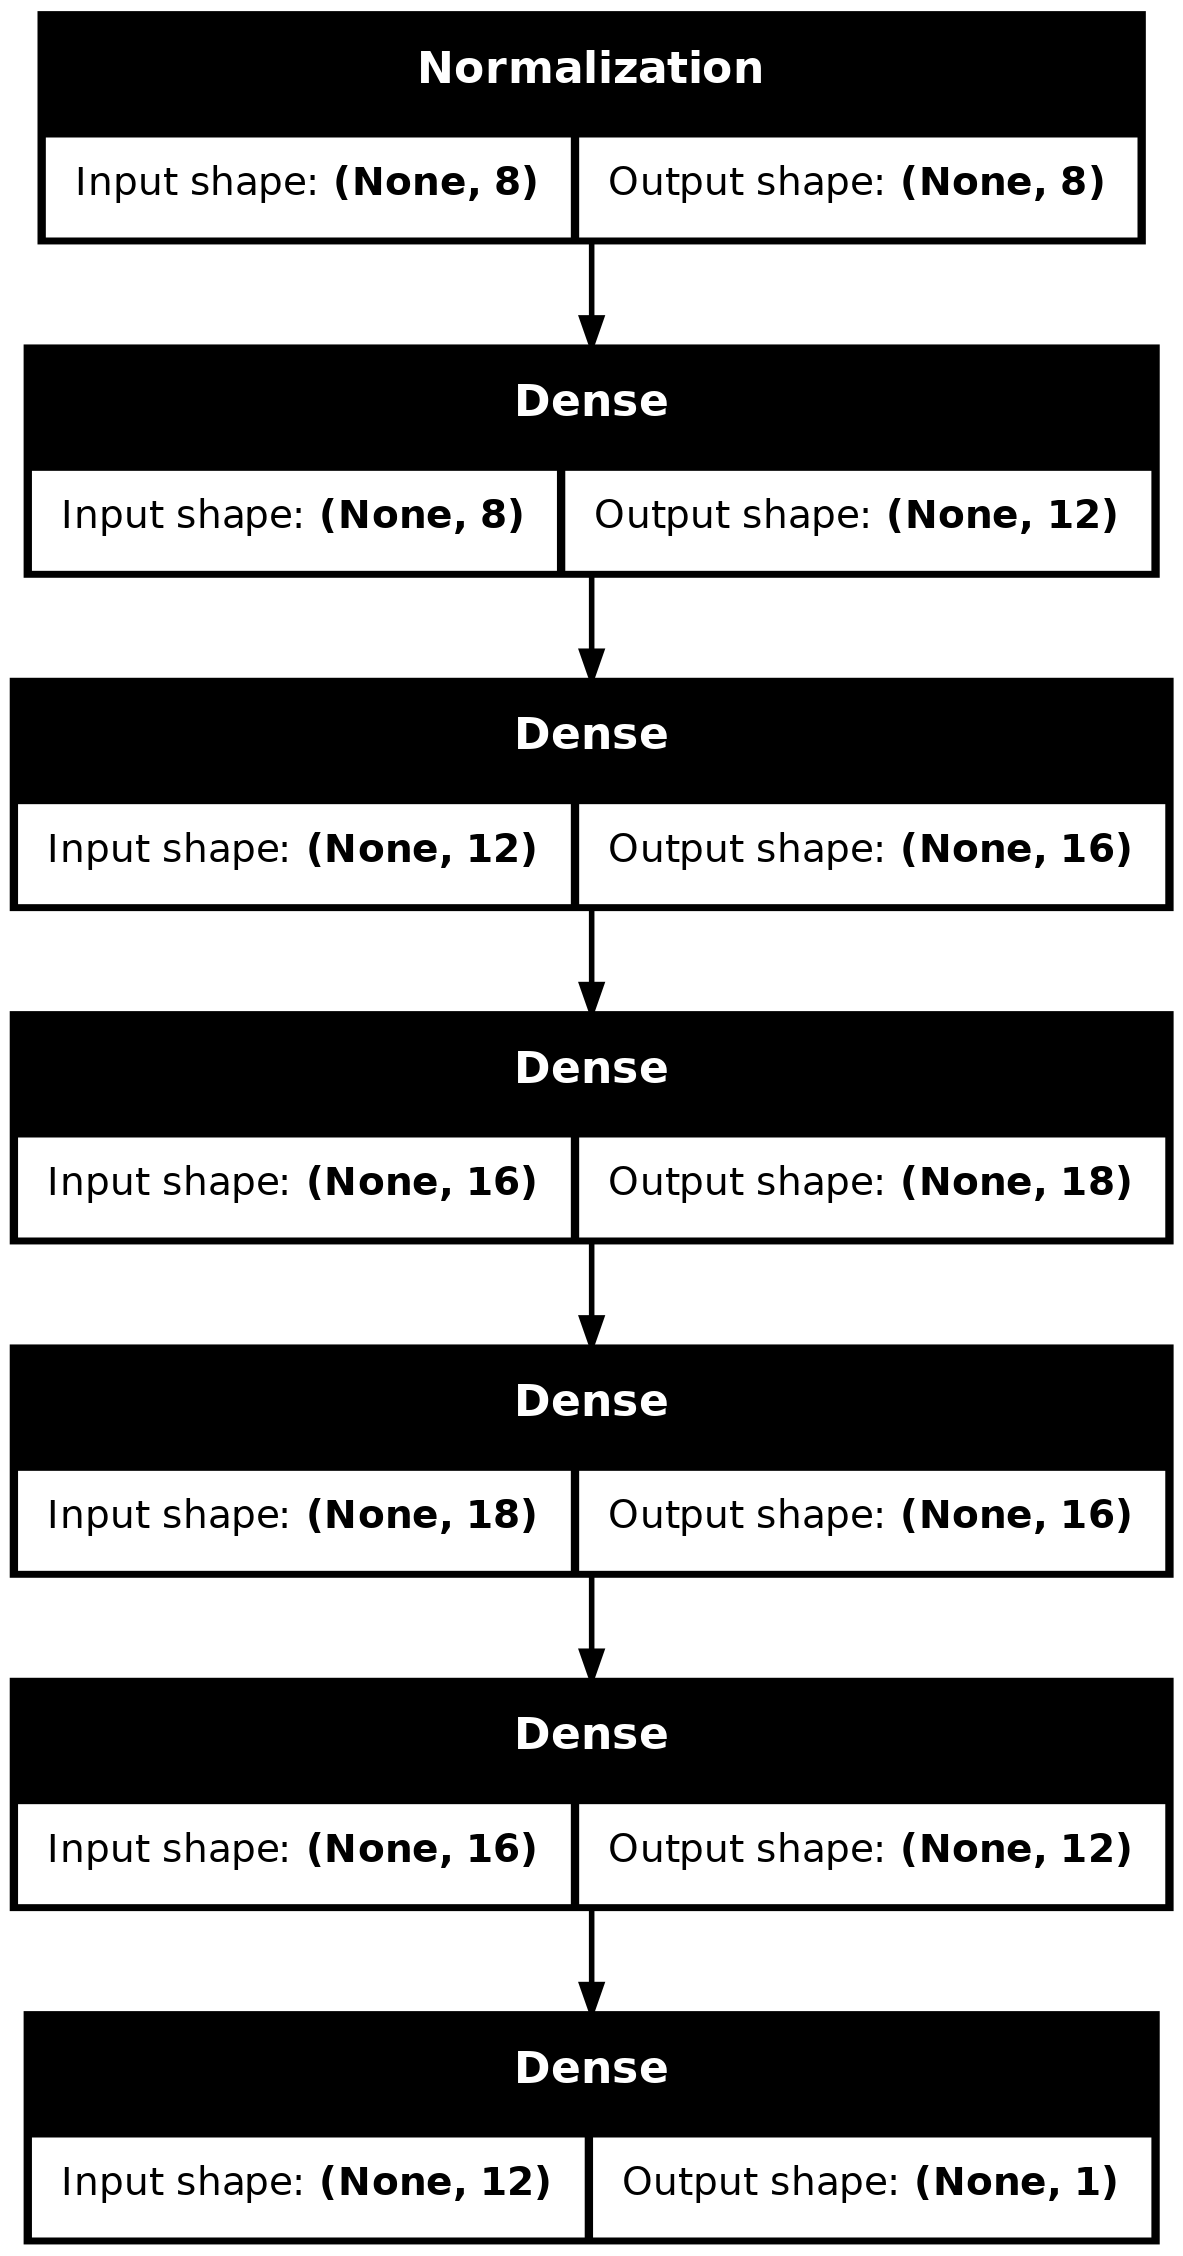

In [584]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [585]:
model.compile(loss=mse,optimizer=Adam(learning_rate=.01),metrics=[RootMeanSquaredError(),R2Score])

In [586]:
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=50, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step - loss: 14.0298 - r2_score: -299.7445 - root_mean_squared_error: 3.7434 - val_loss: 5.0127 - val_r2_score: -88.4423 - val_root_mean_squared_error: 2.2389
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.8514 - r2_score: -88.6574 - root_mean_squared_error: 2.1945 - val_loss: 4.2487 - val_r2_score: -171.7218 - val_root_mean_squared_error: 2.0612
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.1318 - r2_score: -81.9229 - root_mean_squared_error: 2.0276 - val_loss: 1.4356 - val_r2_score: -27.3635 - val_root_mean_squared_error: 1.1982
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3759 - r2_score: -30.0296 - root_mean_squared_error: 1.1722 - val_loss: 1.2255 - val_r2_score: -27.5870 - val_root_mean_squared_error: 1.1070
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9971 - r2_score: -18.3749 - root_mean_squared_error: 0.9965 - val_loss: 0.4564 - val_r2_score: -15.9373 - val_root_mean_squared_error

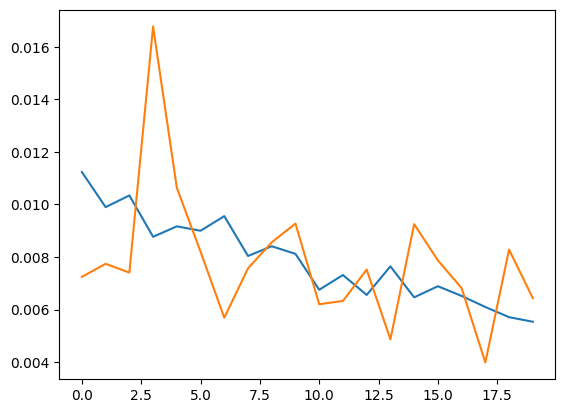

In [587]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][-20:])

plt.plot(history.history['val_loss'][-20:])

In [588]:
model.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 0.0062 - r2_score: 0.9104 - root_mean_squared_error: 0.0787


[0.006187313236296177, 0.07865947484970093, 0.9104189276695251]

In [590]:
model.predict(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


array([[4.0436416],
       [3.7567277],
       [3.883746 ],
       [3.7738972],
       [4.567337 ],
       [4.230408 ],
       [3.9839659],
       [3.8392293],
       [3.9272518],
       [3.9284372],
       [3.7349305],
       [3.861312 ],
       [3.7326124],
       [4.0602026],
       [4.081793 ]], dtype=float32)